<a href="https://colab.research.google.com/github/Pavithrabalusu/CarbonEmission_week1/blob/main/Carbon_Emission_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Carbon Emission Data Preprocessing
This notebook processes a historical carbon emission dataset across countries and years.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('55e3c34c8c2c20110434.csv')
df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,..,..,..,...,..,..,..,..,..,..,..,..,..,..


## 🔍 Initial Exploration

In [2]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country code  13512 non-null  object
 1   Country name  13512 non-null  object
 2   Series code   13512 non-null  object
 3   Series name   13512 non-null  object
 4   SCALE         13512 non-null  object
 5   Decimals      13512 non-null  object
 6   1990          10017 non-null  object
 7   1991          10017 non-null  object
 8   1992          10017 non-null  object
 9   1993          10017 non-null  object
 10  1994          10017 non-null  object
 11  1995          10017 non-null  object
 12  1996          10017 non-null  object
 13  1997          10017 non-null  object
 14  1998          10017 non-null  object
 15  1999          10017 non-null  object
 16  2000          10017 non-null  object
 17  2001          10017 non-null  object
 18  2002          10017 non-null  object
 19  2003

## 🧹 Data Cleaning

In [4]:
# Replace '..' with NaN and convert year columns to numeric
year_cols = [str(y) for y in range(1990, 2012)]
df[year_cols] = df[year_cols].replace('..', np.nan)

# Convert year columns to float
df[year_cols] = df[year_cols].replace('..', np.nan)
df[year_cols].describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,4854,3497,3653,3717,3779,4672,3804,3767,3818,4005,...,4057,4043,4225,5084,4236,4248,4603,3761,2332,2138
unique,3539,2859,2980,3033,3102,3571,3104,3084,3162,3304,...,3320,3300,3401,3911,3451,3472,3519,3071,2185,1442
top,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00,Yes
freq,152,18,26,34,23,87,19,18,22,18,...,42,57,50,101,50,45,102,48,13,155


## 📉 Missing Values Overview

<Axes: title={'center': 'Missing Value Percentage per Year'}>

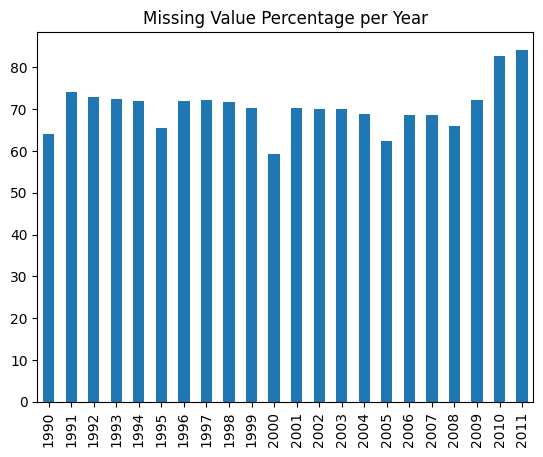

In [5]:
# Check missing values
missing_perc = df[year_cols].isnull().mean() * 100
missing_perc.plot(kind='bar', title='Missing Value Percentage per Year')

## 🛠️ Optional: Reshape the Data (if modeling by year)

In [6]:
# Convert to long format
df_long = df.melt(id_vars=['Country code', 'Country name', 'Series code', 'Series name'],
                 value_vars=year_cols,
                 var_name='Year', value_name='Value')
df_long.dropna(subset=['Value'], inplace=True)
df_long.head()

,Country code,Country name,Series code,Series name,Year,Value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,29.57
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.00
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.00
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,0.21
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),1990,4.97


## 💾 Save Cleaned Data

In [7]:
# Save long-format cleaned data
df_long.to_csv('cleaned_carbon_emissions.csv', index=False)
print('✅ Cleaned data saved.')

✅ Cleaned data saved.
